In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

Simple Vandermondes

[[   1.   -3.    9.  -27.   81. -243.]
 [   1.   -2.    4.   -8.   16.  -32.]
 [   1.   -1.    1.   -1.    1.   -1.]
 [   1.    0.    0.    0.    0.    0.]
 [   1.    1.    1.    1.    1.    1.]
 [   1.    3.    9.   27.   81.  243.]]
1.0 - 5.075 x + 5.52083333 x**2 + 4.85416667 x**3 - 1.02083333 x**4 -
0.27916667 x**5


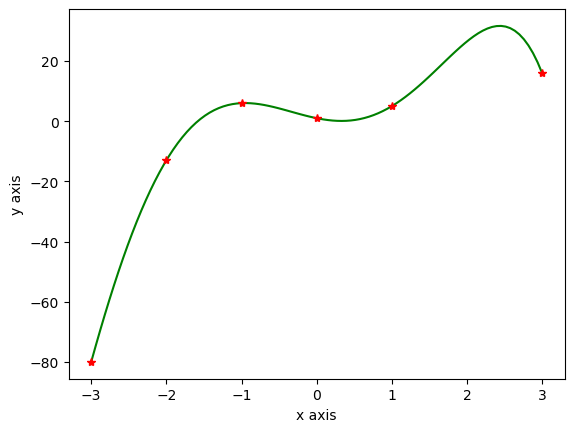

In [13]:
def Vandermonde_coefficient_finder(data_x,data_y):
    Vandermonde_matrix=np.zeros((len(data_x),len(data_x)))
    for i in range (len(data_x)):
        for j in range(len(data_x)):
            Vandermonde_matrix[i][j]=data_x[i]**j
    print(Vandermonde_matrix)        
    Vandermonde_matrix_inverted=np.linalg.pinv(Vandermonde_matrix)
    return np.dot(Vandermonde_matrix_inverted,data_y)
data_x = np.array([-3., -2., -1., 0., 1., 3.])
data_y = np.array([-80., -13., 6., 1., 5., 16.])
coefficients=Vandermonde_coefficient_finder(data_x,data_y)
p=(Polynomial(coefficients))
print(p)

##ploting
x=np.linspace(-3,3,100)
y_value=p(x)

plt.plot(x,y_value,'g')
plt.plot(data_x,data_y,'r*')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

Lagrange Method

Text(0.5, 1.0, 'Lagrange Polynomial')

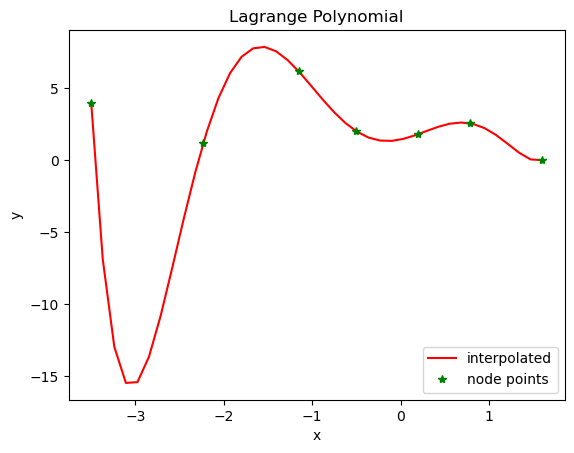

In [19]:
def lagrange_method(data_x,data_y,x_arr):
    def l(k,x_in):
        l_k=1
        for i in range(len(data_x)):
            if i!=k:
                l_k*=(x_in-data_x[i])/(data_x[k]-data_x[i])
        return l_k
    p_x_arr=np.zeros(len(x_arr))
    for i in range (len(x_arr)):
        for j in range (len(data_x)):
            p_x_arr[i]+=data_y[j]*l(j,x_arr[i]) 
    return p_x_arr
data_x = np.array([-3.5, -2.231, -1.152, -0.5, 0.198, 0.785, 1.6])
data_y = np.array([4.0, 1.193, 6.156, 2.0, 1.803, 2.558, 0.0])  
x_arr = np.linspace(-3.5, 1.6, 40)         


p_x_arr = lagrange_method(data_x,data_y,x_arr)

plt.plot(x_arr,p_x_arr,'r')
plt.plot(data_x,data_y,'g*')
plt.legend(['interpolated', 'node points'], loc = 'lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')

Newton's divided difference

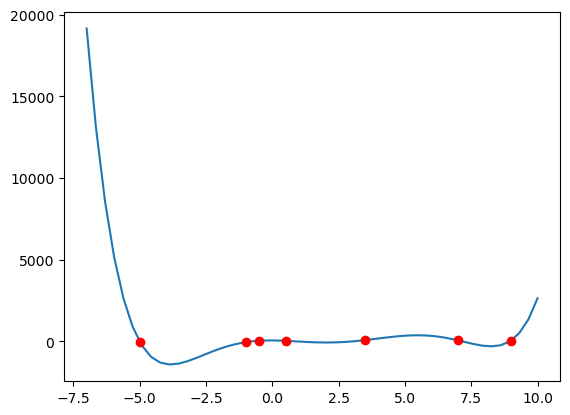

In [32]:
def NewtonsMethod(data_x,data_y,x_arr):
    def divided_difference(data_x,data_y):
        diff_array=np.zeros((len(data_x),len(data_y)))
        for i in range (len(data_x)):
            diff_array[i][0]=data_y[i]
        for column in range (1,len(data_x)):
            for row in range(len(data_x)-column):  ##inorder to reduce column range as it goes down
                diff_array[row][column]=(diff_array[row+1][column-1]-diff_array[row][column-1])/(
                    data_x[row+column]-data_x[row]
                )
        return diff_array[0]
    def n_maker(k,x_in):
        result=1
        for i in range(k):
            result*=(x_in-data_x[i])
        return result    


    difference_array=divided_difference(data_x,data_y)
    
    p_x_arr=np.zeros(len(x_arr)) #to store result value cause unlike class method we need to store results
    #same reason why result=0 is kept inside loop 1 to reset all values
    for j in range(len(x_arr)):
        result=0
        for i in range(len(difference_array)):
            result+=n_maker(i,x_arr[j])*difference_array[i]
        p_x_arr[j]=result
    return p_x_arr
data_x = np.array([-5.,-1,-0.5,0.5,3.5,7.,9])
data_y = np.array([-30., -50., 36., 31., 75., 60., 46.])
x_arr = np.linspace(-7, 10, 50, endpoint=True)
y=(NewtonsMethod(data_x,data_y,x_arr)) 



plt.plot(x_arr, y)
plt.plot(data_x, data_y, 'ro')
plt.show()

### Richardson Extrapolation

Forward, backward, central difference

In [41]:
def forward_difference(polynomial,h,x_in):
    return (polynomial(h+x_in)-polynomial(x_in))/h
def backward_difference(polynomial,h,x_in):
    return (polynomial(x_in)-polynomial(x_in-h))/h
def central_difference(polynomial,h,x_in):
    return (polynomial(x_in+h)-polynomial(x_in-h))/(2*h)

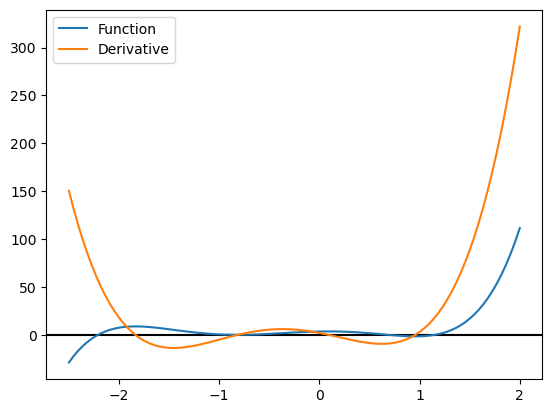

In [37]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

p = Polynomial([3.5, 2.0, -10.0, -6.0, 6.0, 3.0])
data = p.linspace(domain=[-2.5, 2.0])
ax.plot(data[0], data[1], label='Function')

p_prime = p.deriv(1)
data2 = p_prime.linspace(domain=[-2.5, 2.0])
ax.plot(data2[0], data2[1], label='Derivative')

ax.legend()

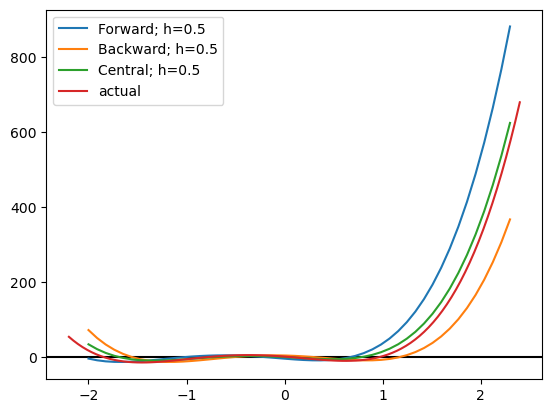

In [48]:
h = 0.5
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.0, 2.3, 50, endpoint=True)
y = forward_difference(p, h, x)
bx.plot(x, y, label='Forward; h=0.5')
y = backward_difference(p, h, x)
bx.plot(x, y, label='Backward; h=0.5')
y = central_difference(p, h, x)
bx.plot(x, y, label='Central; h=0.5')

data2 = p_prime.linspace(domain=[-2.2, 2.4])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()

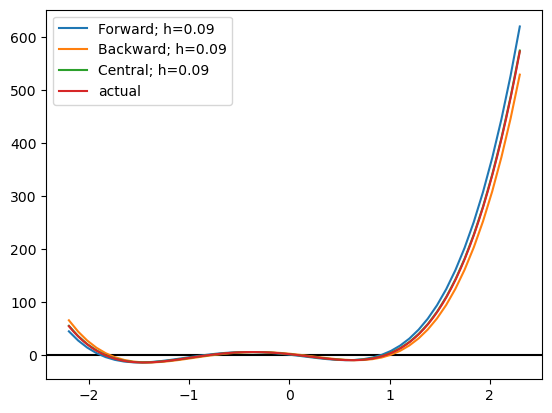

In [50]:
h = 0.09
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 2.3, 50, endpoint=True)
y = forward_difference(p, h, x)
bx.plot(x, y, label='Forward; h=0.09')
y = backward_difference(p, h, x)
bx.plot(x, y, label='Backward; h=0.09')
y = central_difference(p, h, x)
bx.plot(x, y, label='Central; h=0.09')

data2 = p_prime.linspace(domain=[-2.2, 2.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()


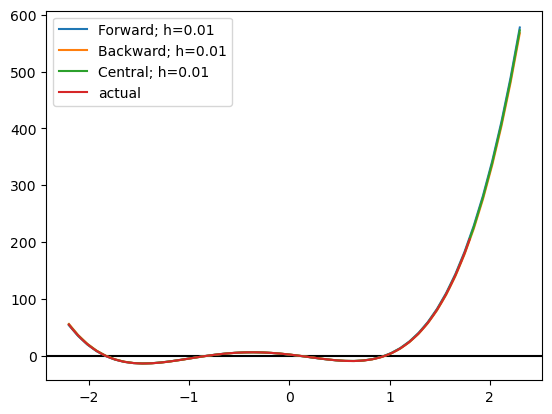

In [52]:
h = 0.01
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 2.3, 50, endpoint=True)
y = forward_difference(p, h, x)
bx.plot(x, y, label='Forward; h=0.01')
y = backward_difference(p, h, x)
bx.plot(x, y, label='Backward; h=0.01')
y = central_difference(p, h, x)
bx.plot(x, y, label='Central; h=0.01')

data2 = p_prime.linspace(domain=[-2.2, 1.8])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()


2.0 - 20.0 x - 18.0 x**2 + 24.0 x**3 + 15.0 x**4
([5161.1875, 241.16901874999974, 116.97629999999958, 62.321173629999805, 35.45630000000034, 19.086066951876603, 10.286774429997934, 5.792995118561123, 3.3962360299908596], [-291.8125, -142.60998125, -87.7676999999999, -52.95256237000018, -32.215699999999686, -18.105912048125504, -9.995169569999575, -5.699358617438293, -3.363835969996501], [2434.6875, 49.27951874999985, 14.604299999999853, 4.6843056299998125, 1.6203000000003271, 0.49007745187554974, 0.14580242999915072, 0.04681825056144362, 0.016200029997150978])


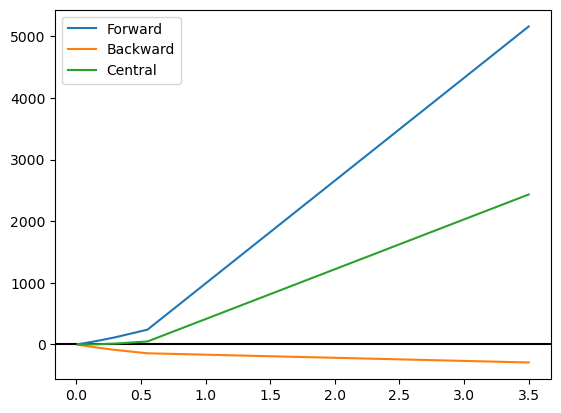

In [46]:
def error_1(polynomial,h_arr,x):
    correct_derivative=polynomial.deriv(1)
    print(correct_derivative)
    f_error=[]
    b_error=[]
    c_error=[]
    for h in h_arr:
        f_error.append(forward_difference(polynomial,h,x)-correct_derivative(x))
        b_error.append(backward_difference(polynomial,h,x)-correct_derivative(x))
        c_error.append(central_difference(polynomial,h,x)-correct_derivative(x))
    return f_error,b_error,c_error
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')
p = Polynomial([3.5, 2.0, -10.0, -6.0, 6.0, 3.0])
h = np.array([3.5, 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
err = error_1(p, h, 2.0)
print(err)
bx.plot(h, err[0], label='Forward')
bx.plot(h, err[1], label='Backward')
bx.plot(h, err[2], label='Central')
bx.legend()

Richardson Extrapolation

In [79]:
def dh(f,h,x):
    return central_difference(f,h,x)


def dh1(f,h,x):
    return (4*dh(f,h/2,x)-dh(f,h,x))/3


def error_2(poly,h,x):
    correct_derivative=poly.deriv(1)
    dh_error=[]
    dh1_error=[]
    for h_i in h:
        dh_error.append(dh(poly,h_i,x)-correct_derivative(x))
        dh1_error.append(dh1(poly,h_i,x)-correct_derivative(x))
    print(pd.DataFrame({"h": h, "Diff": dh_error, "Diff2": dh1_error}))
    return dh_error,dh1_error


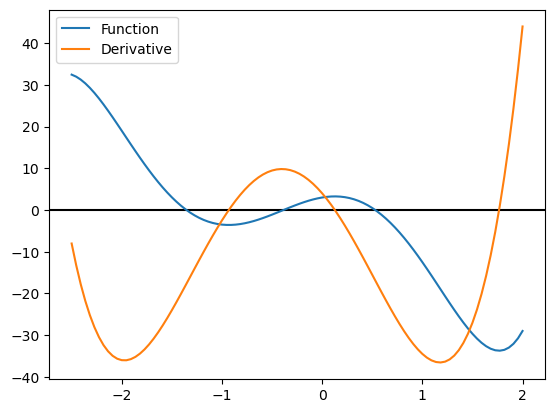

In [67]:
def draw_graph(f, ax, domain=[-10, 10], label=None):
    data = f.linspace(domain=domain)
    ax.plot(data[0], data[1], label=label)
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
p = Polynomial([3.0, 4.0, -14.0, -10.0, 3.0, 1.5])
p_prime = p.deriv(1)
draw_graph(p, ax, [-2.5, 2.0], 'Function')
draw_graph(p_prime, ax, [-2.5, 2.0], 'Derivative')

ax.legend()

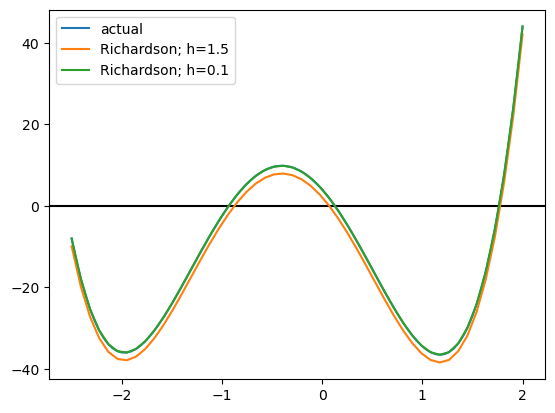

In [58]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

draw_graph(p_prime, ax, [-2.5, 2.0], 'actual')

h = 1.5
x = np.linspace(-2.5, 2.0, 50, endpoint=True)
y = dh1(p, h, x)
ax.plot(x, y, label='Richardson; h=1.5')

h = 0.1
x = np.linspace(-2.5, 2.0, 50, endpoint=True)
y = dh1(p, h, x)
ax.plot(x, y, label='Richardson; h=0.1')

ax.legend()


       h         Diff         Diff2
0  3.500  1131.593750 -5.627344e+01
1  0.550    22.522259 -3.431484e-02
2  0.300     6.672150 -3.037500e-03
3  0.170     2.139853 -3.132038e-04
4  0.100     0.740150 -3.750000e-05
5  0.055     0.223864 -3.431485e-06
6  0.030     0.066601 -3.037501e-07
7  0.017     0.021386 -3.131791e-08
8  0.010     0.007400 -3.749470e-09


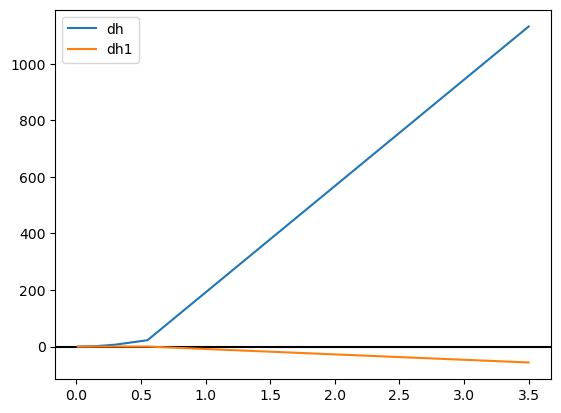

In [80]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
hs = np.array([3.5, 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
e1, e2 = error_2(p, hs, 2.0)

ax.plot(hs, e1, label='dh')
ax.plot(hs, e2, label='dh1')



ax.legend()